<a href="https://colab.research.google.com/github/LeoMx11/Cell-Death-Prediction/blob/main/Cell_Death_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cell Death Prediction

## Collecting Graph Data

To utilize a graph in pytorch geometric GNN models, we need to construct the graph so that the model can read it. To do this, I will make a function that will expedite the process of manually entering which cells are neighbors of one another. There may be a way to automate this, but not one that I have found. So here goes...

In [57]:
import torch
import random
from statistics import mode

In [58]:
def return_graph():

  cur = 1

  bigList = []

  while True:

    user_str = input(f"Please enter all cell numbers touching cell #{cur}, separated only by commas (i.e. '2,14,23,45'). Else if done, type 'done'.")
    user_list = user_str.split(',')

    if user_str == 'done':
      break

    for i in range(len(user_list)):
      if [cur, int(user_list[i])] not in bigList:
        bigList.append([cur, int(user_list[i])])
        bigList.append([int(user_list[i]), cur])

    cur += 1

  return torch.tensor(bigList, dtype=torch.long).t().contiguous()

In [3]:
data = return_graph()

Please enter all cell numbers touching cell #1, separated only by commas (i.e. '2,14,23,45'). Else if done, type 'done'.2,4,5
Please enter all cell numbers touching cell #2, separated only by commas (i.e. '2,14,23,45'). Else if done, type 'done'.3,5
Please enter all cell numbers touching cell #3, separated only by commas (i.e. '2,14,23,45'). Else if done, type 'done'.4,5
Please enter all cell numbers touching cell #4, separated only by commas (i.e. '2,14,23,45'). Else if done, type 'done'.done


In [4]:
# Visualize the graph
import networkx as nx
import matplotlib.pyplot as plt

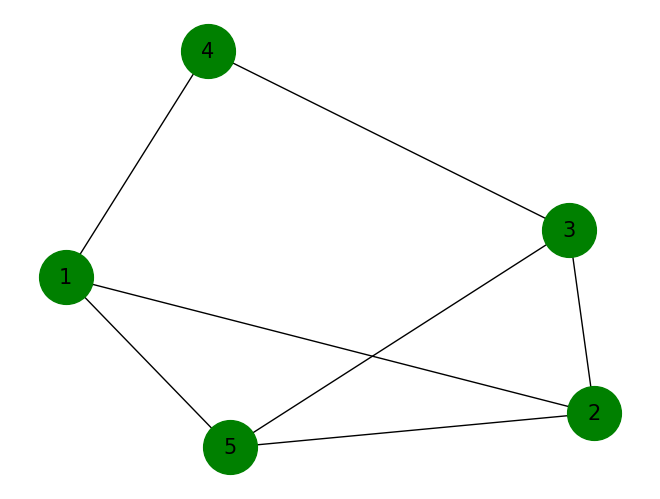

In [60]:
graph = nx.Graph()

done_list = []

for i in range(len(data[0])):
  if [int(data[0][i]), int(data[1][i])] not in done_list:
    graph.add_edge(int(data[0][i]), int(data[1][i]))
    done_list.append([int(data[0][i]), int(data[1][i])])



# Draw the graph
nx.draw(graph, with_labels=True, node_color="green", node_size=1500, font_size=15)

Now we must add the functionality of inputting dead nodes

In [6]:
def get_dead_node_list():

  user_str = input("Please enter all dead cells, separated only by commas (i.e. '2,14,23,45').")
  user_list = user_str.split(',')

  for i in range(len(user_list)):
    user_list[i] = int(user_list[i])

  return user_list

In [7]:
dead_list = get_dead_node_list()

Please enter all dead cells, separated only by commas (i.e. '2,14,23,45').5


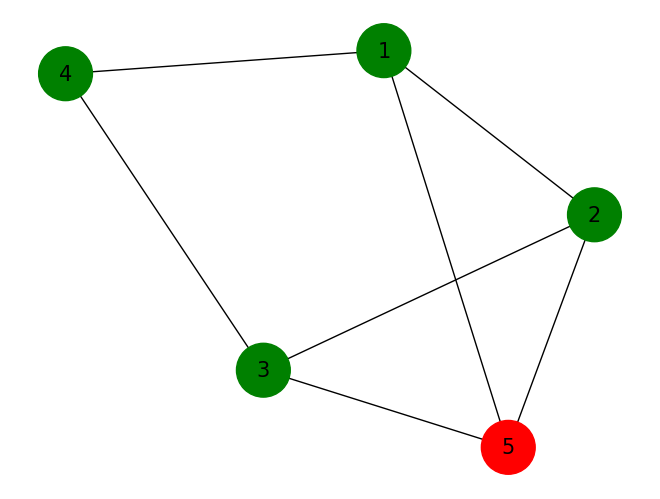

In [61]:
# Draw graph with dead cells highlighted

death_mask = ["red" if x in dead_list else "green" for x in graph.nodes]

nx.draw(graph, with_labels=True, node_color=death_mask, node_size=1500, font_size=15)

## Test run of Graph Neural Network

I will create 20 graphs of size 10 with a clear pattern (The cell with the most edges dies) and see if the model can recognize it.

In [62]:
def create_random_graphs(num_nodes, amount):

  graphList = []

  for i in range(amount):

    numList = []

    collectionList = []

    for j in range(30):
      numList.append(random.randint(1, num_nodes))

    for j in range(len(numList)-1):
      if [numList[j], numList [j+1]] not in collectionList:
        collectionList.append([numList[j], numList[j+1]])
        collectionList.append([numList[j+1], numList[j]])

    graphList.append(collectionList)

  return graphList


In [63]:
myList = create_random_graphs(10, 20)

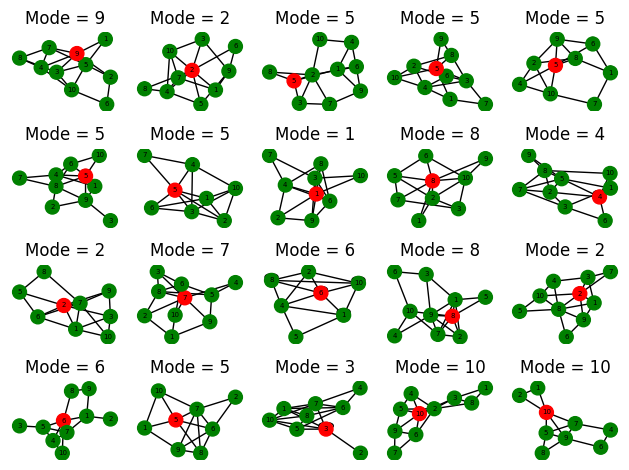

In [68]:
for i in myList:
  graph = nx.Graph()
  mode_list = []
  for j in range(len(i)):
    graph.add_edge(i[j][0], i[j][1])
    mode_list.append(i[j][0])

  plt.subplot(4, 5, myList.index(i) + 1)
  nx.draw(graph, with_labels=True, node_color=["red" if x == mode(mode_list) else "green" for x in graph.nodes], node_size=100, font_size=5)
  plt.title(f"Mode = {mode(mode_list)}")

plt.tight_layout()
plt.show()
